In [225]:
## import dependencies
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from citipy import citipy
from config import api_key
from pprint import pprint




In [128]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [146]:
city_weather_df = pd.DataFrame({'City':cities})
city_weather_df['Lat'] = ''
city_weather_df['Long'] = ''
city_weather_df['Max Temp'] = ''
city_weather_df['Humidity'] = ''
city_weather_df['Cloudiness'] = ''
city_weather_df['Wind Speed'] = ''
city_weather_df['Country'] = ''
city_weather_df['Date'] = ''


In [152]:
not_cities = []


city_url = 'http://api.openweathermap.org/data/2.5/weather?q='

for index, row in city_weather_df.iterrows():
    city_name = row['City']
    response = requests.get(f'{city_url}{city_name}&appid=da17b0325e2143815483997fcbf3f2f2&units=imperial').json()
    try:
        city_weather_df.loc[index, 'Lat'] = response['coord']['lat']
        city_weather_df.loc[index, 'Long'] = response['coord']['lon']
        city_weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        city_weather_df.loc[index, 'Country'] = response['sys']['country']
        city_weather_df.loc[index, 'Date'] = response['dt']
        
    
    
    except KeyError:
        not_cities.append(city_name)


In [153]:
city_weather_df.to_csv('weather_data.csv',index=False)

In [226]:
weather_df = pd.read_csv('weather_data.csv')
weather_df

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,80.60,80.0,100.0,18.14,PF,1.615166e+09
1,jiuquan,39.7432,98.5174,35.49,70.0,1.0,2.21,CN,1.615166e+09
2,oparino,59.8518,48.2783,6.98,95.0,100.0,7.67,RU,1.615166e+09
3,butaritari,3.0707,172.7902,80.74,81.0,85.0,12.68,KI,1.615166e+09
4,nuuk,64.1835,-51.7216,26.60,93.0,90.0,4.61,GL,1.615166e+09
...,...,...,...,...,...,...,...,...,...
616,laguna,38.4210,-121.4238,64.40,34.0,1.0,1.19,US,1.615166e+09
617,cayenne,4.9333,-52.3333,79.00,89.0,75.0,2.30,GF,1.615166e+09
618,ilave,-16.0833,-69.6667,43.41,86.0,64.0,4.07,PE,1.615166e+09
619,deputatskiy,69.3000,139.9000,-16.08,88.0,100.0,5.19,RU,1.615166e+09


In [227]:
clean_weather_df = weather_df.dropna(axis=0,how='any')
clean_weather_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,80.60,80.0,100.0,18.14,PF,1.615166e+09
1,jiuquan,39.7432,98.5174,35.49,70.0,1.0,2.21,CN,1.615166e+09
2,oparino,59.8518,48.2783,6.98,95.0,100.0,7.67,RU,1.615166e+09
3,butaritari,3.0707,172.7902,80.74,81.0,85.0,12.68,KI,1.615166e+09
4,nuuk,64.1835,-51.7216,26.60,93.0,90.0,4.61,GL,1.615166e+09


In [228]:
humid_city_df = clean_weather_df.loc[clean_weather_df['Humidity']>100]
clean_city_df = clean_weather_df.loc[clean_weather_df['Humidity']<=100]

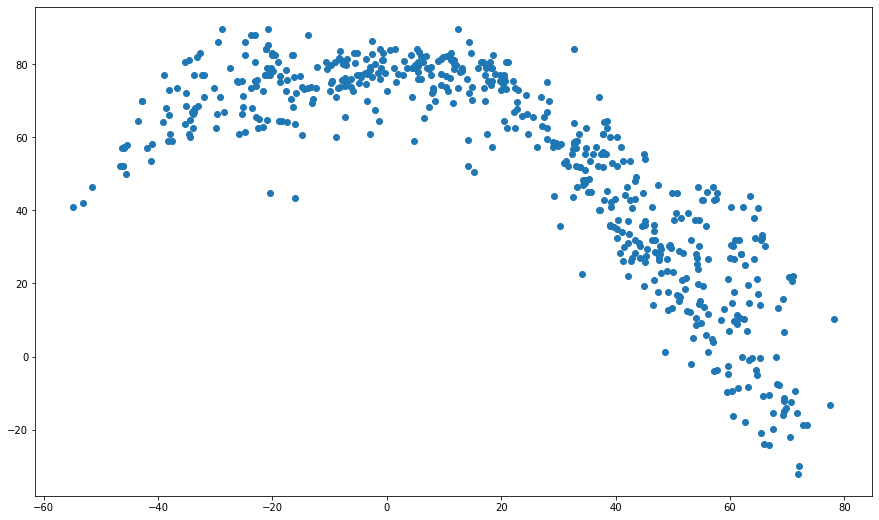

In [229]:
## Temperature (F) vs. Latitude
temp = clean_city_df['Max Temp']
lat = clean_city_df['Lat']

plt.figure(figsize=(15,9))
plt.scatter(lat,temp)

plt.show()



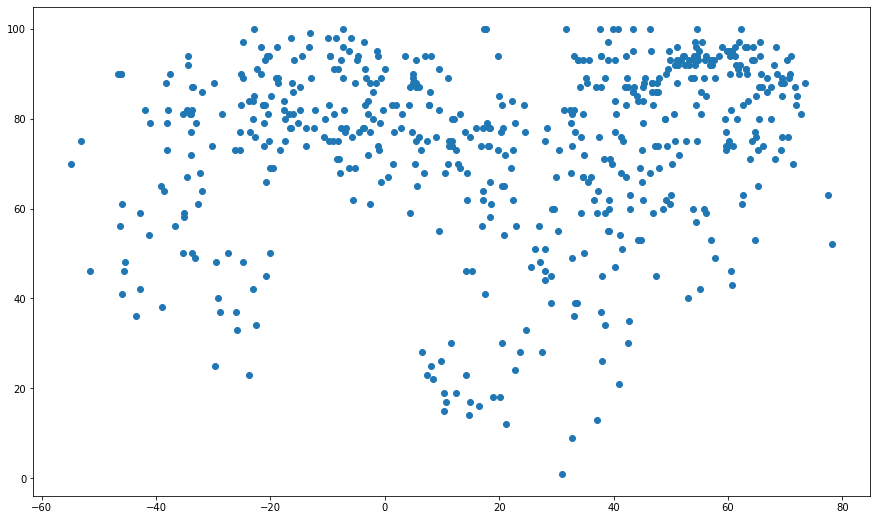

In [230]:
## Humidity (%) vs. Latitude

hum = clean_city_df['Humidity']
lat = clean_city_df['Lat']

plt.figure(figsize=(15,9))
plt.scatter(lat, hum)

plt.show()

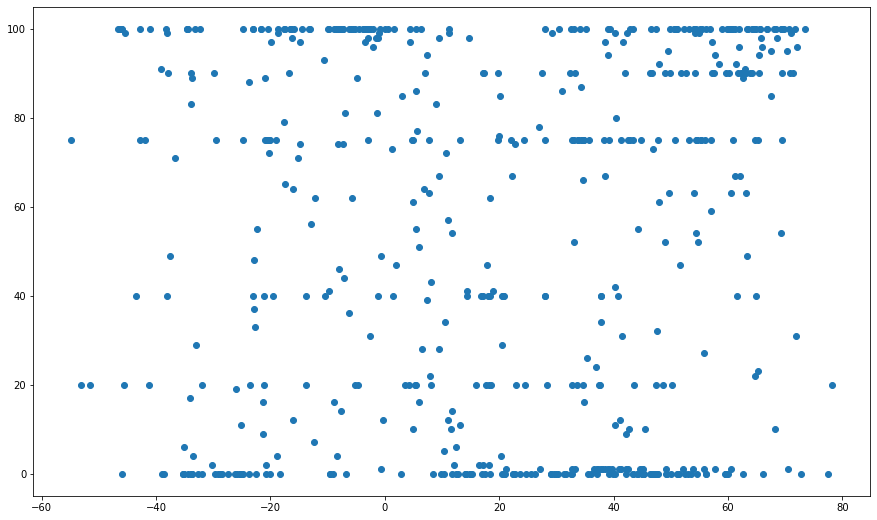

In [231]:
## Cloudiness (%) vs. Latitude

cloud = clean_city_df['Cloudiness']
lat = clean_city_df['Lat']

plt.figure(figsize=(15,9))
plt.scatter(lat,cloud)

plt.show()

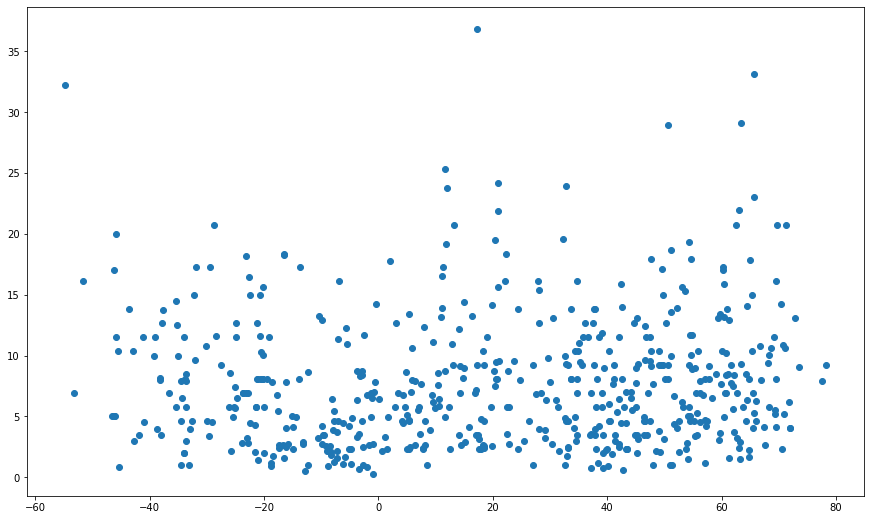

In [232]:
## Wind Speed (mph) vs. Latitude

wind = clean_city_df['Wind Speed']
lat = clean_city_df['Lat']

plt.figure(figsize=(15,9))
plt.scatter(lat,wind)

plt.show()

In [240]:
northern_hem = clean_weather_df.loc[clean_weather_df['Lat']>=0]
southern_hem = clean_weather_df.loc[clean_weather_df['Lat']<0]


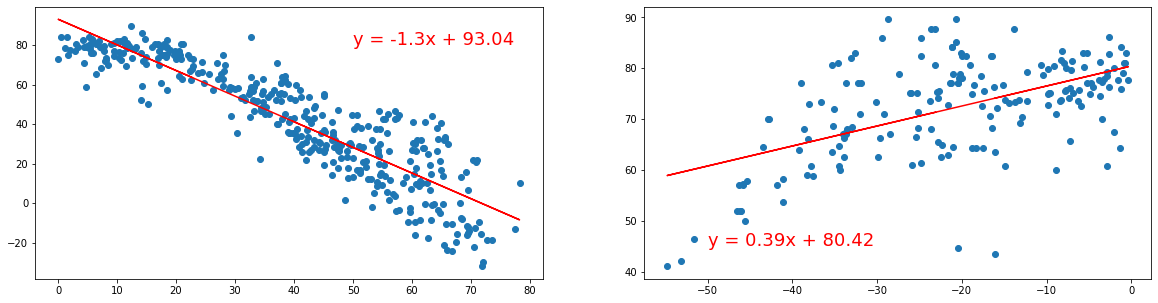

In [241]:
## Hemisphere Temperature (F) vs. Latitude

fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))


## Northern Hemisphere - Temperature (F) vs. Latitude
## variables
north_temp = northern_hem['Max Temp']
north_lat = northern_hem['Lat']

## Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_temp)
temp1_regress_values = (slope * north_lat) + intercept
ntemp_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

## Plot Data
ax1.scatter(north_lat,north_temp)
ax1.plot(north_lat,temp1_regress_values,color='red')
ax1.annotate(ntemp_line_eq,(50,80),fontsize=18,color="red")

## Southern Hemisphere - Temperature (F) vs. Latitude
## variables
south_temp = southern_hem['Max Temp']
south_lat = southern_hem['Lat']

## Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_temp)
temp2_regress_values = (slope * south_lat) + intercept
stemp_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

## Plot Data
ax2.scatter(south_lat,south_temp)
ax2.plot(south_lat,temp2_regress_values,color='red')
ax2.annotate(stemp_line_eq,(-50,45),fontsize=18,color="red")

plt.show()

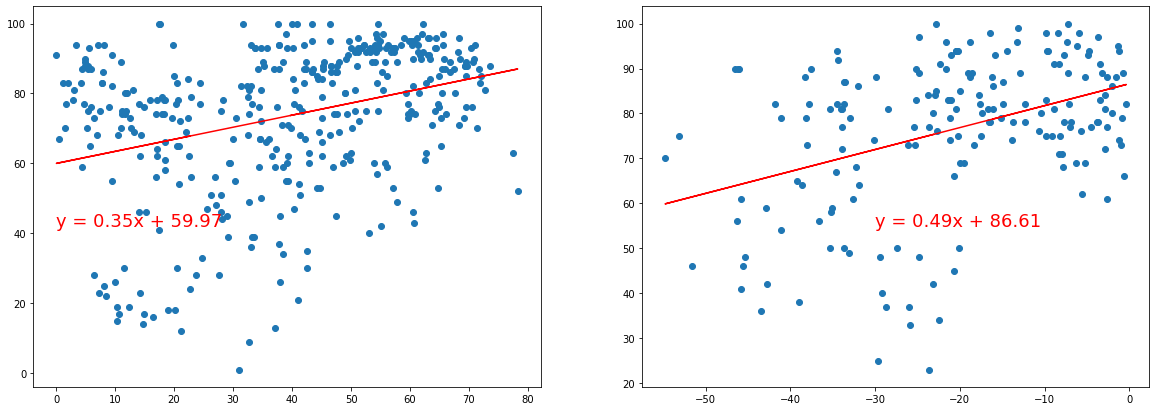

In [242]:
fig2, (ax1,ax2) = plt.subplots(1,2,figsize=(20,7))

## Northern Hemisphere - Humidity (%) vs. Latitude
## variables
north_hum = northern_hem['Humidity']
north_lat = northern_hem['Lat']

## Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_hum)
hum1_regress_values = (slope * north_lat) + intercept
nhum_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

ax1.scatter(north_lat,north_hum)
ax1.plot(north_lat,hum1_regress_values,color='red')
ax1.annotate(nhum_line_eq,(0,42),fontsize=18,color="red")

## Southern Hemisphere - Humidity (%) vs. Latitude
## variables
south_hum = southern_hem['Humidity']
south_lat = southern_hem['Lat']

## Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_hum)
hum2_regress_values = (slope * south_lat) + intercept
shum_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

ax2.scatter(south_lat,south_hum)
ax2.plot(south_lat,hum2_regress_values,color='red')
ax2.annotate(shum_line_eq,(-30,55),fontsize=18,color="red")

plt.show()


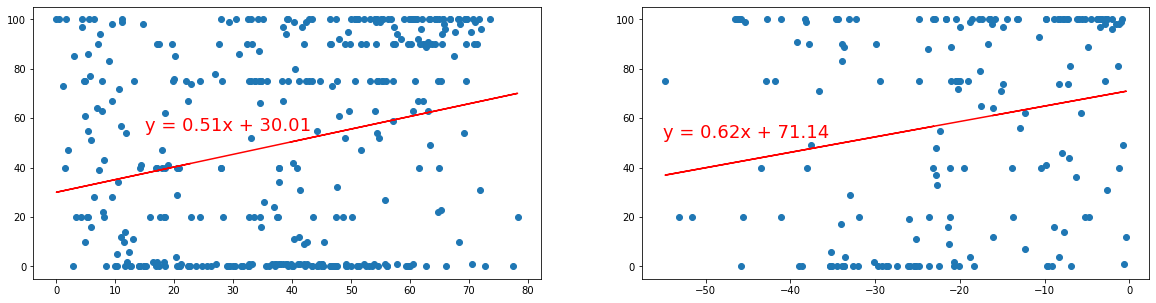

In [243]:
fig3, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

## Northern Hemisphere - Cloudiness (%) vs. Latitude
## variables
north_cloud = northern_hem['Cloudiness']
north_lat = northern_hem['Lat']

## Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_cloud)
cloud1_regress_values = (slope * north_lat) + intercept
ncloud_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

ax1.scatter(north_lat,north_cloud)
ax1.plot(north_lat,cloud1_regress_values,color='red')
ax1.annotate(ncloud_line_eq,(15,55),fontsize=18,color="red")

## Southern Hemisphere - Cloudiness (%) vs. Latitude
## variables
south_cloud = southern_hem['Cloudiness']
south_lat = southern_hem['Lat']

## Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_cloud)
cloud2_regress_values = (slope * south_lat) + intercept
scloud_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

ax2.scatter(south_lat,south_cloud)
ax2.plot(south_lat,cloud2_regress_values,color='red')
ax2.annotate(scloud_line_eq,(-55,52),fontsize=18,color="red")

plt.show()



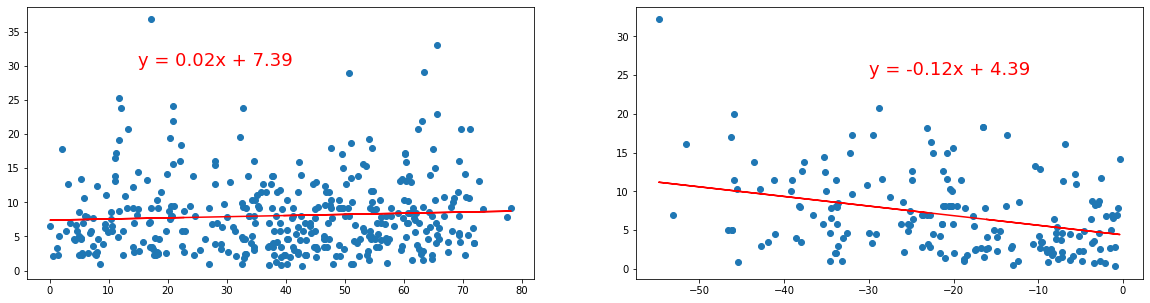

In [244]:
fig3, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

## Northern Hemisphere - Wind Speed (mph) vs. Latitude
## variables
north_wind = northern_hem['Wind Speed']
north_lat = northern_hem['Lat']

## Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_wind)
wind1_regress_values = (slope * north_lat) + intercept
nwind_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

ax1.scatter(north_lat,north_wind)
ax1.plot(north_lat,wind1_regress_values,color='red')
ax1.annotate(nwind_line_eq,(15,30),fontsize=18,color="red")

## Southern Hemisphere - Wind Speed (mph) vs. Latitude
## variables
south_wind = southern_hem['Wind Speed']
south_lat = southern_hem['Lat']

## Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_wind)
wind2_regress_values = (slope * south_lat) + intercept
swind_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

ax2.scatter(south_lat,south_wind)
ax2.plot(south_lat,wind2_regress_values,color='red')
ax2.annotate(swind_line_eq,(-30,25),fontsize=18,color="red")

plt.show()

